# Q) 1.0 Dataset Generation

Generate 10,000 student records with the following attributes:

- gender: Male (65%), Female (33%), Other (2%) 

- major: B.Tech (70%), MS (20%), PhD (10%) 

- program

- GPA

In [1]:
import pandas as pd
import numpy as np

# The numpy.random module implements pseudo-random number generators with the ability to draw samples from a variety of probability distributions.

# Referred Numpy documentation link : https://numpy.org/doc/stable/reference/random/index.html




class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        
        np.random.seed(seed)
        self.num_students = num_students

        # Generate all attributes once during initialization
        self.genders = self.generate_gender()
        self.majors = self.generate_major()
        self.programs = self.generate_program(self.majors)
        self.gpas = self.generate_gpa(self.majors)
        self.dataset = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        genders = np.random.choice(
            ['Male', 'Female', 'Other'],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        )
        return genders.tolist()

    def generate_major(self) -> list[str]:
        majors = np.random.choice(
            ['B.Tech', 'MS', 'PhD'],
            size=self.num_students,
            p=[0.70, 0.20, 0.10]
        )
        return majors.tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        programs = []
        for major in majors:
            if major == 'B.Tech':
                programs.append(np.random.choice(['CSE', 'ECE', 'CHD', 'CND'], p=[0.4, 0.4, 0.1, 0.1]))
            elif major == 'MS':
                programs.append(np.random.choice(['CSE', 'ECE', 'CHD', 'CND'], p=[0.3, 0.3, 0.2, 0.2]))
            elif major == 'PhD':
                programs.append(np.random.choice(['CSE', 'ECE', 'CHD', 'CND'], p=[0.25, 0.25, 0.25, 0.25]))
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        gpas = []
        for major in majors:
            if major == 'B.Tech':
                gpa = np.random.normal(7.0, 1.0)
            elif major == 'MS':
                gpa = np.random.normal(8.0, 0.7)
            elif major == 'PhD':
                gpa = np.random.normal(8.3, 0.5)
            # Clip GPA to [4.0, 10.0]
            gpa = np.clip(gpa, 4.0, 10.0)
            gpas.append(round(float(gpa), 2))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        df = pd.DataFrame({
            'Gender': self.genders,
            'Major': self.majors,
            'Program': self.programs,
            'GPA': self.gpas
        })
        return df

    def get_full_dataframe(self) -> pd.DataFrame:
        return self.dataset


In [2]:
dataset = StudentDataset(num_students=10000, seed=42)
df = dataset.get_full_dataframe()

In [4]:
print(f"Shape of dataset : {df.shape}")
df.head()

Shape of dataset : (10000, 4)


,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,6.37
1,Female,B.Tech,CSE,9.14
2,Female,B.Tech,CSE,8.67
3,Male,B.Tech,ECE,7.73
4,Male,B.Tech,ECE,6.66


In [17]:
print(f"GPA VALUE COUNTS : {df['GPA'].value_counts()}")

GPA VALUE COUNTS : GPA
7.77    56
7.89    48
7.15    47
7.43    47
7.78    46
        ..
4.79     1
9.92     1
4.38     1
4.40     1
9.70     1
Name: count, Length: 550, dtype: int64


## Q 1.1) Dataset Analysis

### a) Visualization 

In [8]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


class StudentDatasetVisualizer:
    def __init__(self, dataset: pd.DataFrame):
        """Initialize with the student dataset."""
        self.dataset = dataset
        sns.set(style="whitegrid", palette="Set2")

    def plot_gender_distribution(self):
        """Show gender distribution."""
        plt.figure(figsize=(5,5))
        plt.pie(
            self.dataset['Gender'].value_counts(),
            labels=self.dataset['Gender'].value_counts().index,
            autopct='%1.1f%%',
            colors=sns.color_palette("pastel"),
            startangle=90
        )
        plt.title('Gender Distribution')
        plt.show()

    def plot_major_distribution(self):
        """Show distribution of students across majors."""
        plt.figure(figsize=(7,5))
        major_counts = self.dataset['Major'].value_counts().reset_index()
        major_counts.columns = ['Major', 'Count']
        sns.barplot(data=major_counts, x='Major', y='Count', palette='crest')
        plt.title('Major-wise Student Count')
        plt.xlabel('Major')
        plt.ylabel('Count')
        plt.xticks(rotation=30)
        plt.show()

    def plot_program_distribution(self):
        """Show distribution of students across programs."""
        plt.figure(figsize=(7,5))
        prog_counts = self.dataset['Program'].value_counts().reset_index()
        prog_counts.columns = ['Program', 'Count']
        sns.barplot(data=prog_counts, x='Program', y='Count', palette='viridis')
        plt.title('Program-wise Student Count')
        plt.xlabel('Program')
        plt.ylabel('Count')
        plt.show()

    def plot_gpa_distribution(self, bins: int = 15):
        """Visualize GPA distribution."""
        plt.figure(figsize=(6,5))
        sns.histplot(self.dataset['GPA'], bins=bins, kde=True, color='crimson', alpha=0.7)
        plt.title('GPA Distribution')
        plt.xlabel('GPA')
        plt.ylabel('Number of Students')
        plt.show()

    def plot_program_by_major(self):
        """Show program distribution across majors."""
        plt.figure(figsize=(7,5))
        crosstab = pd.crosstab(self.dataset['Major'], self.dataset['Program'])
        sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
        plt.title('Program Distribution across Majors')
        plt.xlabel('Program')
        plt.ylabel('Major')
        plt.show()

    def plot_gpa_by_major(self):
        """Compare GPA across majors."""
        plt.figure(figsize=(7,5))
        sns.violinplot(data=self.dataset, x='Major', y='GPA', inner='quartile', palette='muted')
        plt.title('GPA Distribution across Majors')
        plt.xlabel('Major')
        plt.ylabel('GPA')
        plt.xticks(rotation=25)
        plt.show()

    def plot_gpa_by_program(self):
        """Compare GPA across programs."""
        plt.figure(figsize=(7,5))
        sns.violinplot(data=self.dataset, x='Program', y='GPA', inner='quartile', palette='cool')
        plt.title('GPA Distribution across Programs')
        plt.xlabel('Program')
        plt.ylabel('GPA')
        plt.show()

    def plot_gpa_by_program_and_major(self):
        """Visualize GPA conditioned on both program and major."""
        plt.figure(figsize=(8, 5))
        sns.pointplot(
            data=self.dataset,
            x='Major', y='GPA',
            hue='Program', dodge=True,
            markers=['o', 's', 'D', '^'],
            ci='sd', linestyles='--'
        )
        plt.title('Average GPA by Program and Major')
        plt.xlabel('Major')
        plt.ylabel('Average GPA')
        plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

        
    def plot_sampled_dataset(self):
        """Show 100 randomly sampled students with their Gender, Major, Program, and GPA."""
        sample_df = self.dataset.sample(min(100, len(self.dataset)), random_state=42)

        print("\nSample of 100 Students (first 10 shown):")
        print(sample_df[['Gender', 'Major', 'Program', 'GPA']].head(10))

        plt.figure(figsize=(9, 5))
        sns.scatterplot(
        data=sample_df,
        x='Major', y='GPA',
        hue='Program',
        style='Gender',
        s=80, alpha=0.8,
        palette='Set2'
    )

        plt.title('GPA Distribution of 100 Random Students', fontsize=13, fontweight='bold')
        plt.xlabel('Major')
        plt.ylabel('GPA')
        plt.xticks(rotation=15)
        plt.legend(title='Program / Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()



    def plot_dataset_summary(self):
        """Display dataset summary using pairplot for all numeric columns."""
        numeric_cols = self.dataset.select_dtypes(include='number').columns.tolist()

        if len(numeric_cols) > 1:
            sns.pairplot(
            self.dataset,
            hue='Major',
            vars=numeric_cols,
            corner=True,
            palette='husl',
            diag_kind='kde'
        )
            plt.suptitle('Comprehensive Dataset Summary by Major', y=1.03)
            plt.show()
        else:
            # fallback visualization if only GPA is numeric
            self.plot_gpa_distribution()



In [34]:
visualizer = StudentDatasetVisualizer(df)

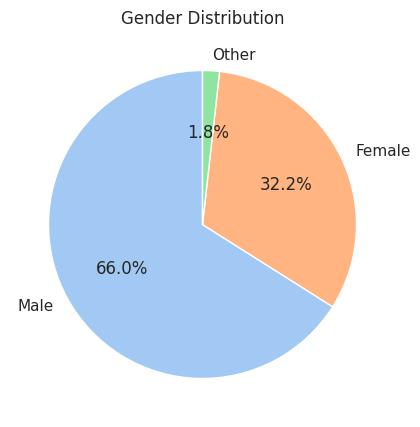

/tmp/ipykernel_9075/3125245606.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=major_counts, x='Major', y='Count', palette='crest')


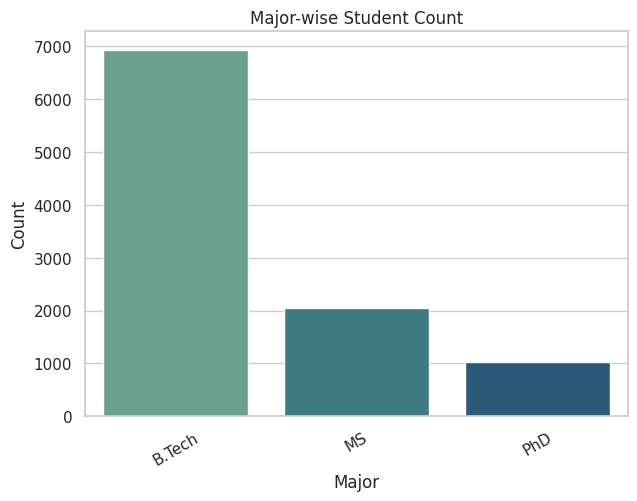

/tmp/ipykernel_9075/3125245606.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prog_counts, x='Program', y='Count', palette='viridis')


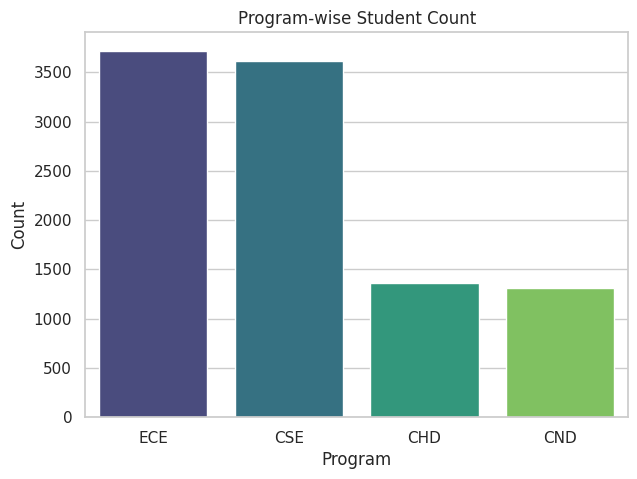

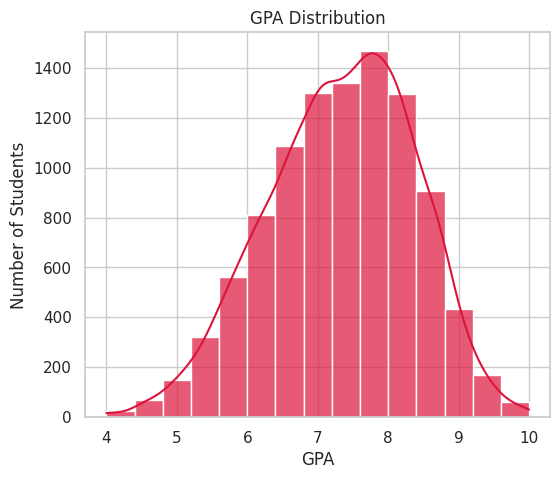

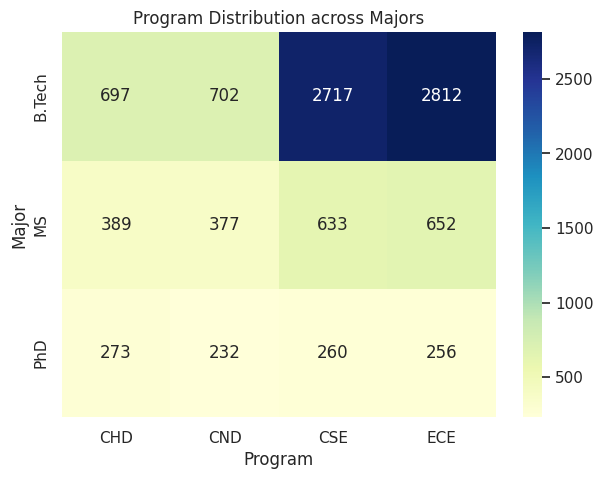

/tmp/ipykernel_9075/3125245606.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.dataset, x='Major', y='GPA', inner='quartile', palette='muted')


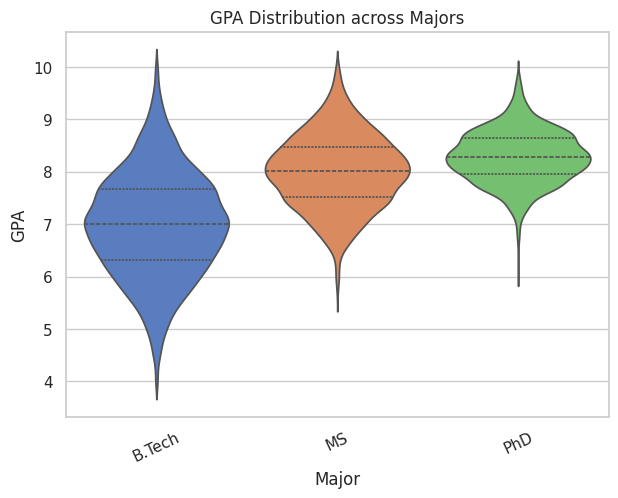

/tmp/ipykernel_9075/3125245606.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.dataset, x='Program', y='GPA', inner='quartile', palette='cool')


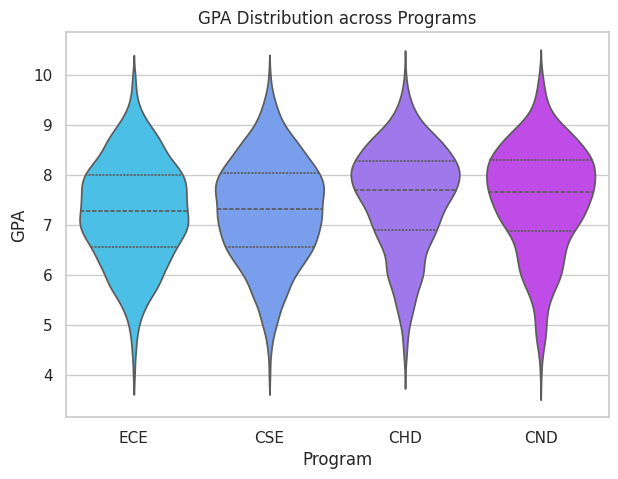

/tmp/ipykernel_9075/3125245606.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(


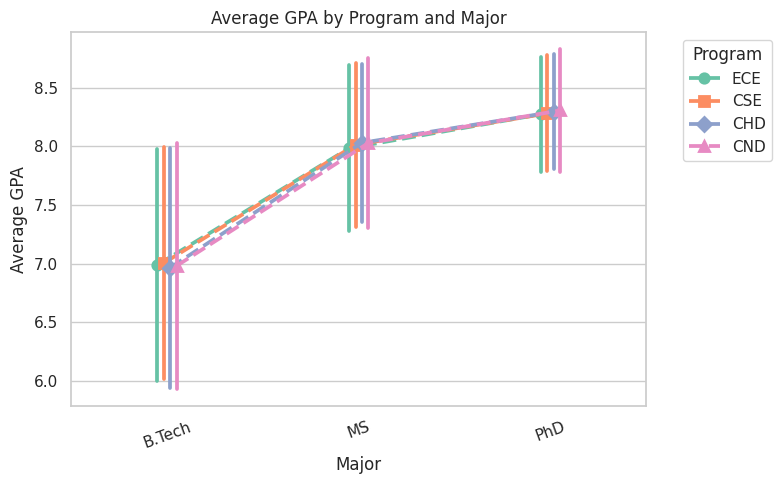


Sample of 100 Students (first 10 shown):
      Gender   Major Program   GPA
6252    Male  B.Tech     CND  7.33
4684  Female      MS     CSE  7.33
1731    Male  B.Tech     CND  8.61
4742    Male      MS     CSE  8.09
4521    Male     PhD     ECE  9.26
6340    Male  B.Tech     ECE  8.10
576     Male     PhD     CND  7.84
5202    Male  B.Tech     ECE  5.93
6363    Male  B.Tech     CSE  5.83
439     Male  B.Tech     CSE  6.82


/home/aditya/ml_lab_IT2718/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aditya/ml_lab_IT2718/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aditya/ml_lab_IT2718/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aditya/ml_lab_IT2718/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/aditya/ml_lab_IT2718/m

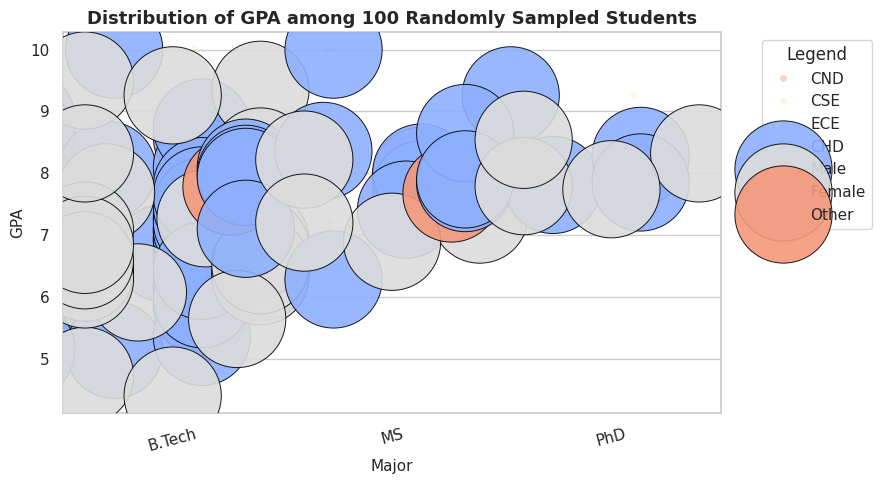

AttributeError: 'StudentDatasetVisualizer' object has no attribute 'plot_entire_dataset_summary'

In [ ]:
# Gender distribution
visualizer.plot_gender_distribution()

#  Major distribution
visualizer.plot_major_distribution()

#  Program distribution
visualizer.plot_program_distribution()

#  GPA histogram (you used countplot, but histogram is better for continuous data)
visualizer.plot_gpa_distribution()

#  Program conditioned on Major
visualizer.plot_program_by_major()

#  GPA conditioned on Major
visualizer.plot_gpa_by_major()

#  GPA conditioned on Program
visualizer.plot_gpa_by_program()

#  GPA conditioned on both Program and Major
visualizer.plot_gpa_by_program_and_major()

#  Sampled dataset visualization (100 random students)
visualizer.plot_sampled_dataset()

#  Overall dataset summary
visualizer.plot_dataset_summary()
